# Data visualization

## 01 Setup

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path
path = r'/Users/peanutcookie/instacart-book/'

In [3]:
# Import orders_products_merged.pkl file
df_orders = pd.read_pickle(os.path.join(path, '_database', 'orders_products_merged.pkl'))

In [4]:
df_orders.dtypes

order_id                   object
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
new_customer                 bool
product_id                 object
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                   object
department_id              object
prices                    float64
price_range                object
price_range_loc            object
busiest_days               object
busiest_hours              object
max_order                   int64
loyalty_flag               object
average_price             float64
spending_type              object
median_prior_orders       float64
order_frequency_flag       object
dtype: object

In [5]:
# Import customers.pkl file
df_customers = pd.read_pickle(os.path.join(path, '_database', 'customers.pkl'))
df_customers.dtypes

user_id        object
gender         object
state          object
age             int64
signup_date    object
income          int64
dtype: object

In [6]:
# Merge dataframes
df_instacart_data = df_orders.merge(df_customers, on = 'user_id')

## 02 Sampling data set

In [26]:
# Set seed
np.random.seed(4)

In [27]:
# Create list of random floating numbers between 0 and 1 and uniform distribution
dev = np.random.rand(len(df_instacart_data)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
# Create a sample dataframe with 70% of the data
sample70 = df_instacart_data[dev]

In [30]:
# Create a sample dataframe with 30% of the data
sample30 = df_instacart_data[~dev]

In [31]:
# Accuracy check
len(df_instacart_data)

32404859

In [32]:
len(sample70) + len(sample30)

32404859

In [33]:
# Create new dataframe for further data analysis
df_order_days_prices = sample30[['orders_day_of_week','prices']]

In [34]:
# Subset sample dataframe 
fig7sample = sample30[['order_hour_of_day', 'prices']]

In [35]:
fig8sample = sample30[['age', 'income']]

In [40]:
fig9sample = sample30[['income', 'gender', 'loyalty_flag', 'age']]

## 03 Data visualisation

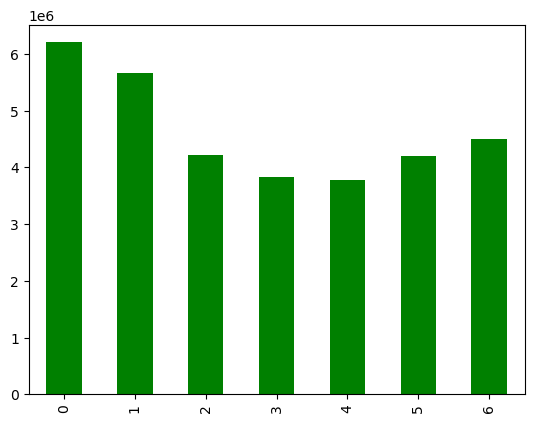

In [17]:
# Visualise frequency of orders for week days
fig1 = df_orders['orders_day_of_week'].value_counts().sort_index().plot.bar(color="green")

*Fig.1 Bar chart - frequency of orders for each day of the week.*

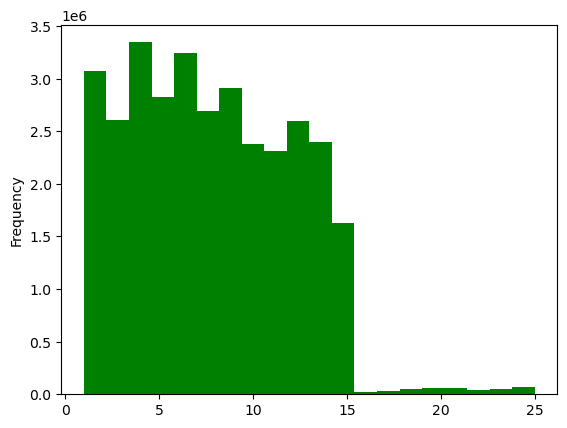

In [18]:
# Show the density of a price (continuous) variable
fig2 = df_orders['prices'].plot.hist(bins = 20, color="green")

*Fig.2 Histogram - Density of prices*

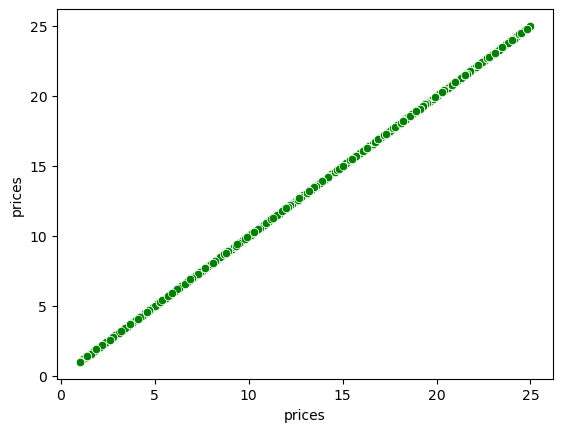

In [45]:
# Show distribution of data points in prices
fig3 = sns.scatterplot(x = 'prices', y = 'prices',data = df_orders, color="green")

*Fig. 3 Scatterplot - Distribution of prices.*

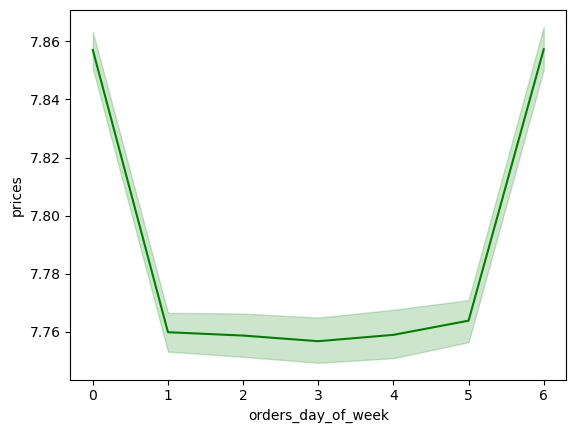

In [20]:
# Visualise customer spending for week days
fig4 = sns.lineplot(data = df_order_days_prices, x = 'orders_day_of_week',y = 'prices', color="green")

*Fig. 4 Line chart - Change in customer spending depending on the day of the week.*

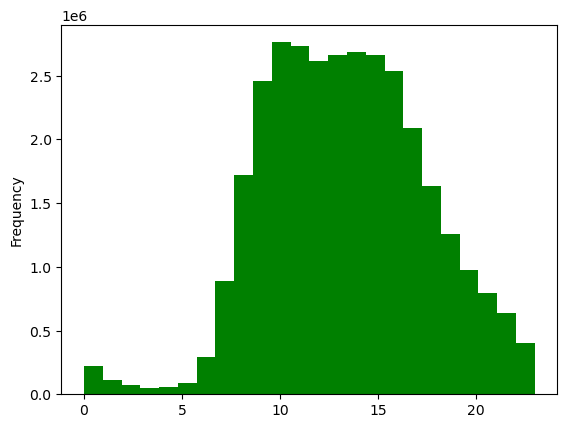

In [21]:
# Visualise customer activity during the day
fig5 = df_orders['order_hour_of_day'].plot.hist(bins = 24, color="green")

*Fig 5. Histogram - Customers activity during the day.*

In [22]:
# Statistics insights for day hours
df_orders['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

**MOST ORDERS** = Between 8 - 18 the orders number don't drop below 1.6 mln <br/>
**AVERAGE ORDERS** = At 19 orders osccilate below 1.6 Mln but are higher than 1 mln <br/>
**FEWEST ORDERS** = Orders occuring between 21 and 7 are below 1 mln 

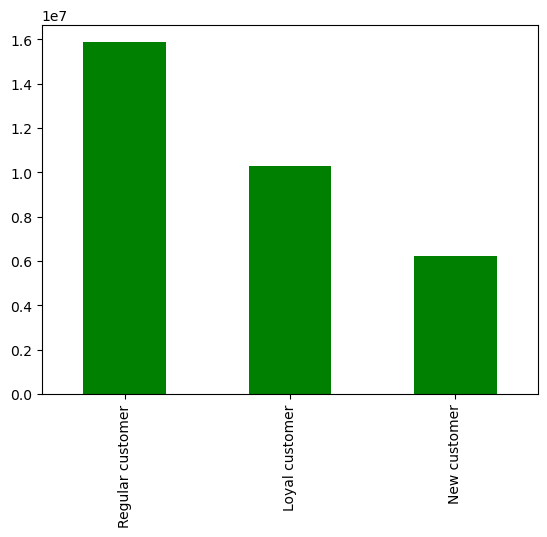

In [23]:
# Visualise distribution of loyal customers
fig6 = df_orders['loyalty_flag'].value_counts().plot.bar(color="green")

*Fig 6. Bar chart - Distribution of customers.*

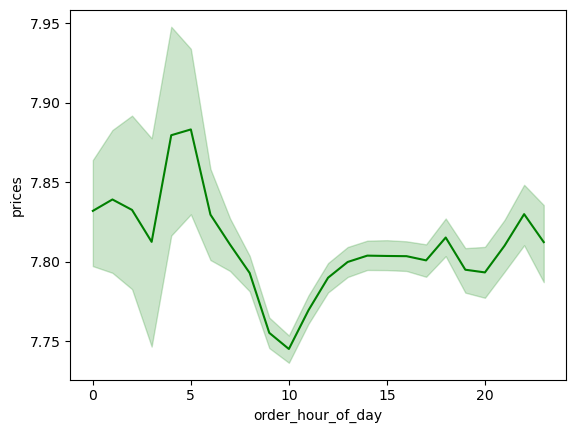

In [24]:
# Visualise expediture difference
fig7 = sns.lineplot(data = fig7sample, x = 'order_hour_of_day', y = 'prices', color="green")

*Fig. 7. Lineplot - Expediture differences.*

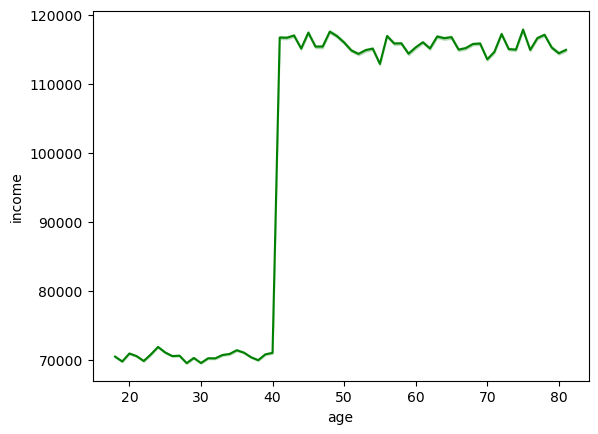

In [43]:
# Visualise connection between age and income
fig8 = sns.lineplot(data = fig8sample, x = 'age', y = 'income', color="green")

*Fig. 8 Line chart - Correlation between age and income.*

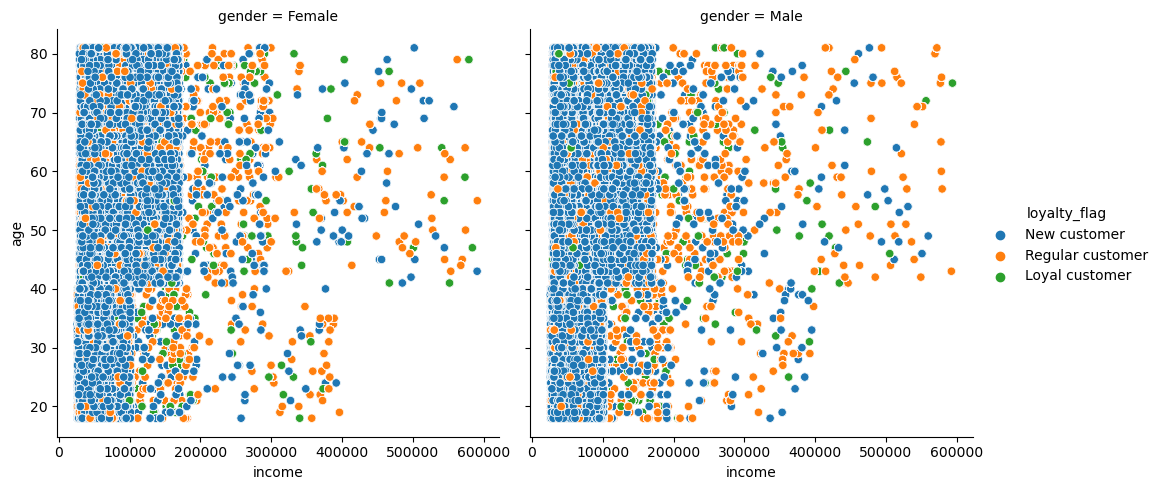

In [42]:
fig9 = sns.relplot(
    data=sample30,
    x="income", y="age", hue="loyalty_flag", col="gender",
)

*Fig. 9 Heatmap - Income distribution by age and gender for different customers types.*

## 03 Export

In [49]:
# Export data to pkl
df_instacart_data.to_pickle(os.path.join(path, '_database', 'instacart_data.pkl'))

In [51]:
fig1.figure.savefig(os.path.join(path, '_static/assets', 'fig1.png'))
fig2.figure.savefig(os.path.join(path, '_static/assets', 'fig2.png'))
fig3.figure.savefig(os.path.join(path, '_static/assets', 'fig3.png'))
fig4.figure.savefig(os.path.join(path, '_static/assets', 'fig4.png'))
fig5.figure.savefig(os.path.join(path, '_static/assets', 'fig5.png'))
fig6.figure.savefig(os.path.join(path, '_static/assets', 'fig6.png'))
fig7.figure.savefig(os.path.join(path, '_static/assets', 'fig7.png'))
fig8.figure.savefig(os.path.join(path, '_static/assets', 'fig8.png'))
fig9.figure.savefig(os.path.join(path, '_static/assets', 'fig9.png'))